In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time

$\textbf{1-D Advection equation } $
\begin{equation}
       \partial_t u + \partial_x u = 0, 
\end{equation}

$\textbf{Algorithm 4.1 Reconstruct-evolve-average } $(Leveuqe FVM red book pg 76)
1. Reconstruct a piecewise polynomial function $\tilde{q}^n(x, t_n)$ defined for all x, from the cell
averages $Q_n$
In the simplest case this is a piecewise constant function that takes the
value $Q_n$ in the ith grid cell, i.e.,
$$\tilde{q}^n(x, t_n) = Q_i^n \text{ for all x} \in C_i$$

2. Evolve the hyperbolic equation exactly (or approximately) with this initial data to obtain
$\tilde{q}^n(x, t_{n+1})$ a time $\Delta t$ later.

3. Average this function over each grid cell to obtain new cell averages
$$Q_i^{n+1} = \frac{1}{\Delta x} \int_{C_i} \tilde{q}^n(x, t_{n+1}) dx


In [2]:
def cell_avg(u):
    n = len(u)
    cell_avg = np.zeros(n)
    for i in range(n):
        if i+1 < n:
            cell_avg[i] = 0.5 * (u[i] + u[(i + 1)])
        else:
            cell_avg[i] = 0.5 * (u[i] + u[(i - 1)])
            
    return cell_avg

def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords



def rea(u,t0,T,x,c):
    # average 
    def cell_avg(u):
        n = len(u)
        cell_avg = np.zeros(n)
        for i in range(n):
            if i+1 < n:
                cell_avg[i] = 0.5 * (u[i] + u[(i + 1)])
            else:
                cell_avg[i] = 0.5 * (u[i] + u[(i - 1)])
            
        return cell_avg
    
    #reconstruct 
    Q = cell_avg(u)
    Nt = np.ceil((T-t0)/dt)
    dtNew = (T-t0)/Nt

    # Find discontinuity 
    for i in range(1,len(Q)):
        if Q[i] != Q[i-1]:
            disocon = i 
            


# Evolve Exactly 
    t = t0
    while t<T:
        Q = cell_avg(g(x-c*t))
        t += dtNew
    return Q



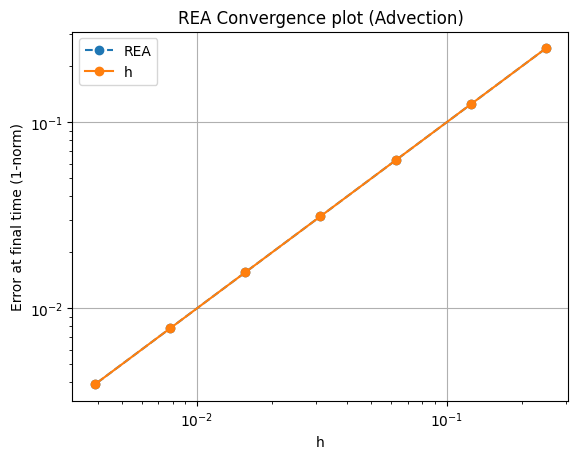

In [3]:
# convergence analysis 

#initial parameters 
#initial condtion for advection 
def g(x):
    return np.where(x <= 0, 1, 2)

T = 0.25
t0 = 0
c = 1 #advection speed

k_values = range(3, 10)
errors = []
h_val = []

for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = h/2
    u = g(x)
    Qnew = rea(u, t0, T, x, c)
    
    # Calculate the error as the 1-norm between Qnew and the exact solution
    exact_solution = cell_avg(g(x-c*T))
    error = np.linalg.norm(Qnew - exact_solution, ord=1)
    
    errors.append(error*h)
    h_val.append(h)

# # Display the errors
# for i, error in enumerate(errors):
#     print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")

# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'REA')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('REA Convergence plot (Advection)')
plt.legend()
plt.grid(True)
plt.show()

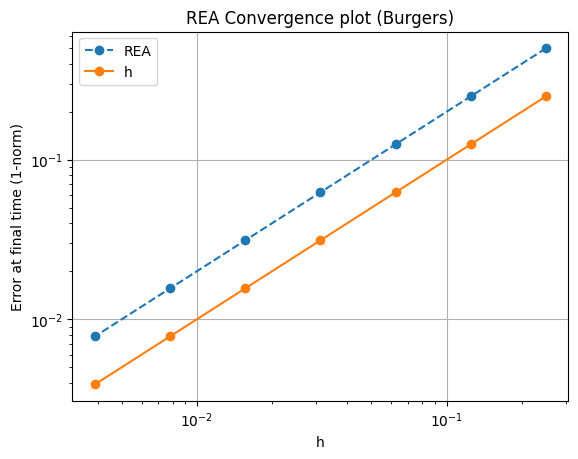

In [4]:
# initial condition function g(x) Burgers 
def g(x):
    return np.where(x <= 0, 3, 1)

T = 0.25
t0 = 0
c = 2 # burgers speed 

k_values = range(3, 10)
errors = []
h_val = []

for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(-1, 1, n_nodes)
    dt = h/2
    u = g(x)
    Qnew = rea(u, t0, T, x, c)
    
    # Calculate the error as the 1-norm between Qnew and the exact solution
    exact_solution = cell_avg(g(x-c*T))
    error = np.linalg.norm(Qnew - exact_solution, ord=1)
    
    errors.append(error*h)
    h_val.append(h)

# # Display the errors
# for i, error in enumerate(errors):
#     print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")

# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'REA')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('REA Convergence plot (Burgers)')
plt.legend()
plt.grid(True)
plt.show()

Godunov flux function for convex scalar conservation law (Leveque Red p228)

$$F_{i-\frac{1}{2}}^n = \begin{cases}
    f(Q_{i-1}) & \text{if } Q_{i-1} > q_s &\text{and} &s > 0\\
    f(Q_i) & \text{if } Q_i < q_s &\text{and} &s < 0\\
    f(q_s) & \text{if } & Q_{i-1} < q_s < Q_i\\

    \end{cases}
$$

$s$ = $\frac{[f(Q_i) - f(Q_{i-1})]}{Q_i - Q_{i-1}} $

Godunov method reduced to the first-order upwind method

$$Q^{n+1}_i = Q_i - \frac{\Delta t}{\Delta x}[f(Q_i)-f(Q_{i-1})] $$

$q_s$ is the unique value of q for which $f'(q_s) = 0$


Here you seek a numerical solution of $\textbf{Burgers' equation}$

\begin{equation}
       \partial_t u + \frac{1}{2}\partial_x u^2 = 0, 
\end{equation}

in the domain $\Omega = [-1,1]$ and a time interval $[0,0.25]$. The boundary condition is $u(0,t) = 3$ and the initial condition is 
    
\begin{equation}
    u(x,0) = \left\{
    \begin{aligned}
        3, &\,\,\quad ~if \quad x<0 ,\\
        1 &\,\, \quad ~if \quad x>0.
    \end{aligned}
    \right.
\end{equation}

Given Piecewise constant initial data $u_l = 3 > 1 = u_r$  implies this is case 1 where there is a unique weak solution. Appying the Rankine-Hugoniot  condition 

$$\frac{f(u_r)-f(u_l)}{u_l - u_r} =\frac{ \frac{1}{2} 1^2 - \frac{1}{2} 3^2}{1-3} = 2 = s$$

Given s = speed of propogation we our exact solution is: 
$$ u(x, t) = \begin{cases}
    3 & \text{if } x < 2t \\
    1 & \text{if } x \geq 2t
\end{cases}
$$


Godunov's method (Hesthaven p124)
$$u_j^{n+1} = u_j^n - \frac{k}{h}[F_{j+\frac{1}{2}}^n - F_{j-\frac{1}{2}}^n]$$
The scheme is in conservation form by construction ensuring correct shock speeds. Unknown is the cell average rather than the point value as with the finite difference scheme.

Consider Burgers's equation 
$$ u_{j+\frac{1}{2}}^* =   \left\{
\begin{array}{ll}
      u_l, & s \geq 0\\
      u_r, & s < 0\\
\end{array} 
\right.  $$

$$ s = \frac{f(u_l)-f(u_r)}{u_l - u_r}$$

$$u_j^{n+1} = u_j^n - \frac{k}{h} [f(u_{j+\frac{1}{2}}^*) - f(u_{j-\frac{1}{2}}^*)] $$
$u^*$ is computed by solving the Riemann problem exactly and selecting the correct entropy solution.



Leveque Green pg. 144

In [5]:
# mesh generator function
def mesh_generator_1d(x_l, x_r, n_nodes):
    h = (x_r - x_l) / (n_nodes - 1)
    x_coords = np.linspace(x_l, x_r, n_nodes)
    return h, x_coords

# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 3, 1)

# exact solution function f(x, t)
def f_exact(x, t):
    return np.where(x <= 2*t, 3, 1)

# flux function for burgers
def flux(q):
    return np.power(q,2)/2

def solve_riemann(ql, qr, flux):
    # Calculate the speed
    # s = (flux(qr) - flux(ql)) / ((qr - ql) + 1e-10)
    s = c
    qs = 0 #For burgers q_s = 0
    # Determine the flux based on the conditions
    if ql > qs and s > 0:
        return ql
    elif qr < qs and s < 0:
        return qr
    else:
        return flux(qs)



def godunov_solver(n_nodes, T, h, x):
    
    # h, x = mesh_generator_1d(x_l, x_r, n_nodes)  # Generate the mesh

    dx = h
    dt = dx/c  # CFL condition
    N = n_nodes  # Number of nodes

    # Initialize solution array
    u = g(x)  # Initialize u with the initial condition

    # Perform Godunov's method
    t = 0
    while t < T:
        u_old = u.copy()
        for i in range(1, N - 1): # loop over interior points
            ql = u_old[i - 1] # get solution to the left
            qr = u_old[i] # get solution at the current point
            q_left = solve_riemann(ql, qr, flux) # solve riemann at left interface
            ql = u_old[i] # get solution at current point
            qr = u_old[i + 1] # get solution at the right of the point
            q_right = solve_riemann(ql, qr, flux) # Solve the riemann at the right interface
            f_left = flux(q_left) # compute left flux
            f_right = flux(q_right) # compute right flux 
            u[i] = u_old[i] - dt / dx * (f_right - f_left) # update the solution using the godunov method
            #update boundary conditions
            # u[0] = u[-2]
            u[-1] = u[1] 
        t += dt # increment time 

    return u, x

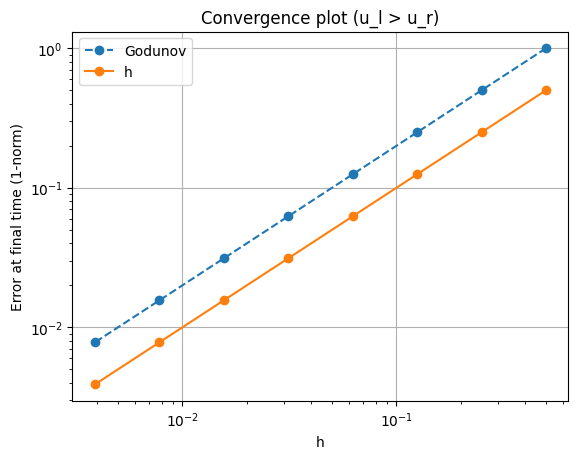

In [6]:
#Def for burgers equation
#qs = 0 for burgers 
# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 3, 1)

# exact solution function f(x, t)
def f_exact(x, t):
    return np.where(x <= 2*t, 3, 1)




# Perform the convergence analysis
errors = []
h_val = []

T = 0.25     #final time
c = 2 #speed for burgers
x_r  = 1
x_l = -1


k_values = range(2, 10)
for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    u, x_coords = godunov_solver(n_nodes, T, h ,x)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    # h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# # Display the errors
# for i, error in enumerate(errors):
#     print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")

# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot (u_l > u_r)')
plt.legend()
plt.grid(True)
plt.show()


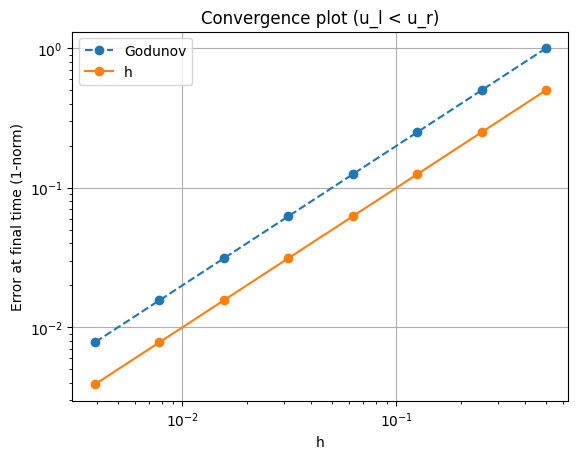

In [7]:
# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 1, 3)

# exact solution function f(x, t)
def f_exact(x, t):
    return np.where(x <= 2*t, 1, 3)





# Perform the convergence analysis
errors = []
h_val = []

# Parameters 
T = 0.25     #final time
c = 2 #speed for burgers
x_r  = 1
x_l = -1


k_values = range(2, 10)
for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    u, x_coords = godunov_solver(n_nodes, T, h, x)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    # h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# # Display the errors
# for i, error in enumerate(errors):
#     print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")

# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot (u_l < u_r)')
plt.legend()
plt.grid(True)
plt.show()


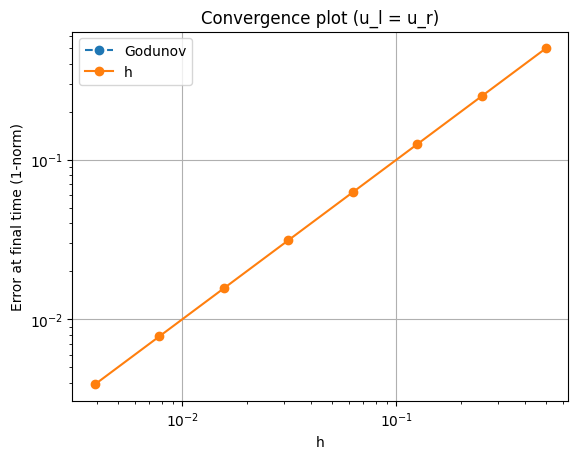

In [8]:


# initial condition function g(x)
def g(x):
    return np.where(x <= 0, 3, 3)

# exact solution function f(x, t)
def f_exact(x, t):
    return np.where(x <= 2*t, 3, 3)






# Perform the convergence analysis
errors = []
h_val = []

T = 0.25     #final time
c = 2 #speed for burgers
x_r  = 1
x_l = -1


k_values = range(2, 10)
for k in k_values:
    n_nodes = 2 ** k + 1
    h, x = mesh_generator_1d(x_l, x_r, n_nodes)
    u, x_coords = godunov_solver(n_nodes, T, h , x)
    # Calculate the error as the 1-norm between u and the exact solution
    error = np.linalg.norm(u - f_exact(x_coords, T), ord=1)
    # h = (x_r - x_l) / (n_nodes - 1)
    errors.append(error*h)
    h_val.append(h)

# # Display the errors
# for i, error in enumerate(errors):
#     print(f"Error for n_nodes={2 ** k_values[i] + 1}: {error}")

# Generate the convergence plot
plt.figure()
plt.loglog(h_val, errors, 'o--', label = 'Godunov')
plt.loglog(h_val, h_val, 'o-', label = 'h')

plt.xlabel('h')
plt.ylabel('Error at final time (1-norm)')
plt.title('Convergence plot (u_l = u_r)')
plt.legend()
plt.grid(True)
plt.show()
